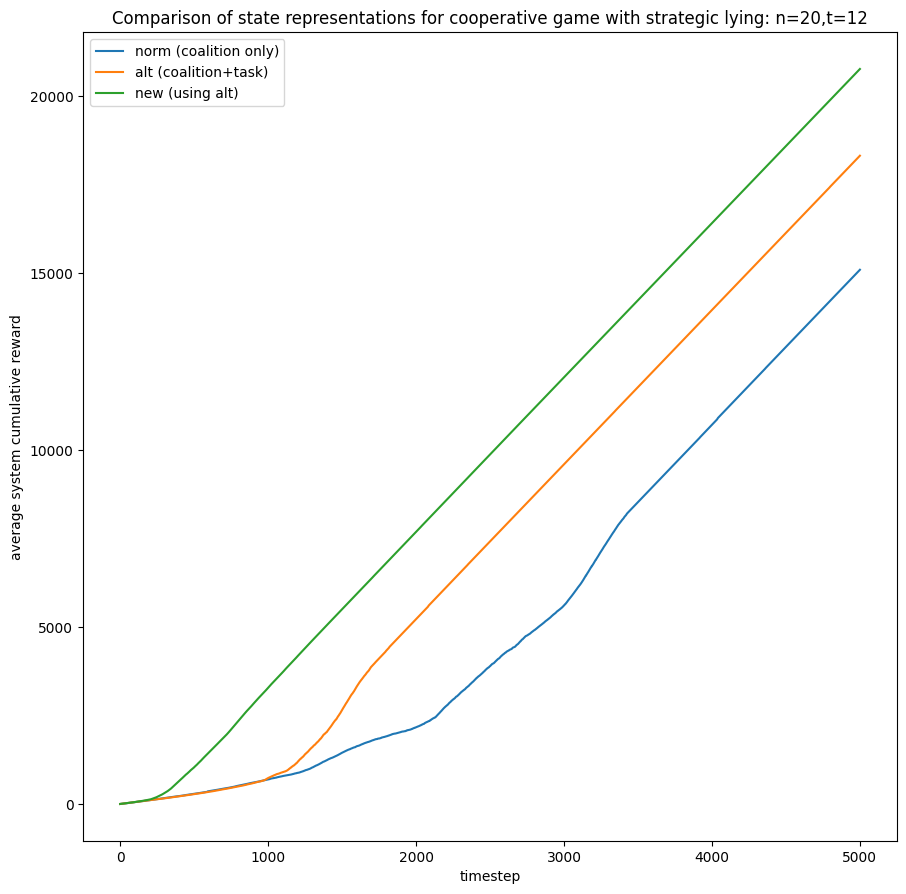

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 20
t = 12

norm = np.load(f'data/n{n}t{t}_state_rep_norm.npy')
alt = np.load(f'data/n{n}t{t}_state_rep_alt.npy')
third = np.load(f'data/n{n}t{t}_newmethod.npy')

norm = np.mean(norm, axis=0)
alt = np.mean(alt, axis=0)
third = np.mean(third, axis=0)

plt.title(f'Comparison of state representations for cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('timestep')
plt.ylabel('average system cumulative reward')
plt.plot(norm, label='norm (coalition only)')
plt.plot(alt, label='alt (coalition+task)')
plt.plot(third, label='new (using alt)')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()